In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [3]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [5]:
df_train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,...,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,...,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,...,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,-0.007201,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,...,-0.044791,0.025077,-0.030681,0.012739,0.021949,-0.003569,-0.035306,-0.069973,-0.010988,0.160526
TP_ESTADO_CIVIL,0.003678,NaN,0.020813,0.020947,0.533462,1.000000,0.004950,-0.012160,-0.000046,0.000243,...,-0.017455,-0.009670,-0.016354,-0.002580,0.025840,0.002294,-0.014725,-0.066346,-0.022736,0.108771
TP_COR_RACA,0.005707,NaN,-0.236178,-0.234786,0.009675,0.004950,1.000000,0.015761,-0.253524,-0.252162,...,-0.010398,0.004446,0.031514,0.026052,0.055185,0.086642,0.069298,0.046830,0.053556,0.020966
TP_NACIONALIDADE,-0.006217,NaN,0.009710,0.009433,-0.017713,-0.012160,0.015761,1.000000,NaN,NaN,...,0.013515,0.001575,-0.003419,-0.018290,-0.005285,0.032588,0.024112,0.011327,0.014847,0.008132
CO_MUNICIPIO_NASCIMENTO,-0.004527,NaN,0.865294,0.864791,-0.030711,-0.000046,-0.253524,NaN,1.000000,0.999860,...,-0.001793,-0.043358,-0.051102,-0.057239,-0.046998,-0.024174,-0.038666,-0.097273,-0.081490,-0.042237
CO_UF_NASCIMENTO,-0.004615,NaN,0.865216,0.864919,-0.030259,0.000243,-0.252162,NaN,0.999860,1.000000,...,-0.002089,-0.043492,-0.051094,-0.056401,-0.047069,-0.024201,-0.038305,-0.096666,-0.080963,-0.042134


In [6]:
features = ['NU_NOTA_CN', 'NU_NOTA_CH',
'NU_NOTA_LC', 'NU_NOTA_REDACAO',
'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_MT']

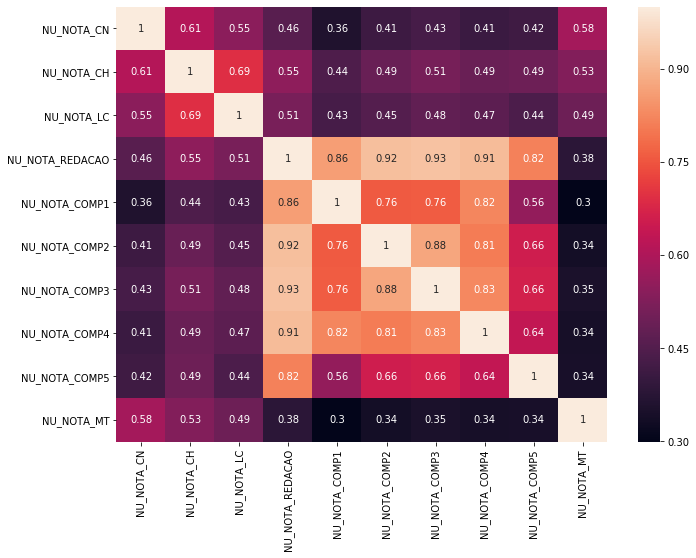

In [7]:
corr = df_train[features].corr()
plt.figure(figsize=(11, 8))
sns.heatmap(corr, annot=True)

In [8]:
#df_train = df_train[df_train['TP_PRESENCA_MT'] == 1]

In [9]:
#Verificando a quantidade de valores nulos
df_train[features].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
NU_NOTA_MT         3597
dtype: int64

In [11]:
features_test = ['NU_NOTA_CN', 'NU_NOTA_CH',
'NU_NOTA_LC', 'NU_NOTA_REDACAO',
'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']

In [12]:
df_train[features] = df_train[features].fillna(df_train[features].mean())
df_test[features_test] = df_test[features_test].fillna(df_test[features_test].mean())

In [13]:
df_train[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_MT         0
dtype: int64

In [14]:
df_test[features_test].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

# Análise Exploratória

NameError: name 'model' is not defined

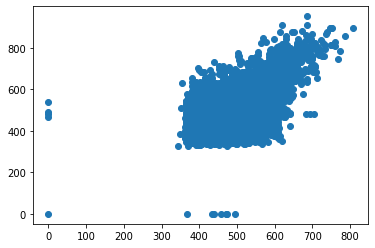

In [39]:
plt.scatter(np.array(X_train)[:, 0], np.array(y_train))
plt.plot(np.array(X_train)[:, 0], model.predict(X_train), color='red')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


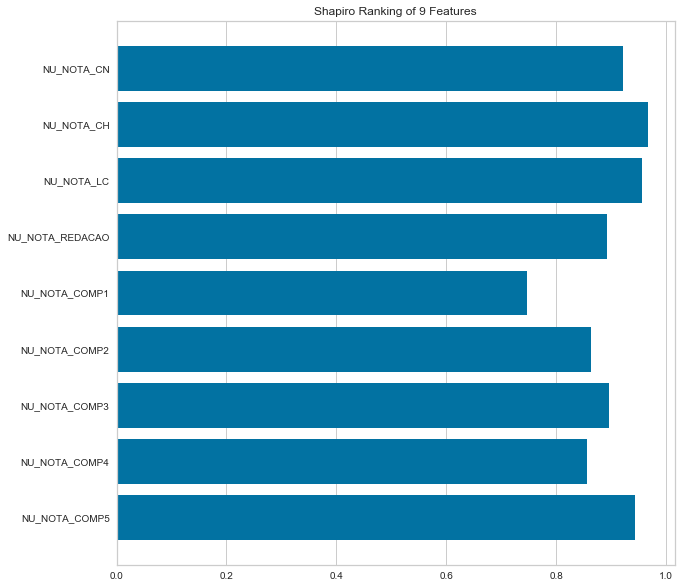

In [672]:
#Visualização da importancia das features usando Shapiro
from yellowbrick.features import Rank1D
# Criando o visualizador
visualizer = Rank1D(algorithm='shapiro')
plt.figure(figsize=(10,10))
visualizer.fit(X_train, y_train)           # Fit nos dados para o visualizer
visualizer.transform(X_train)        # Tranformando os dados
visualizer.show()              # Imprimindo as figuras

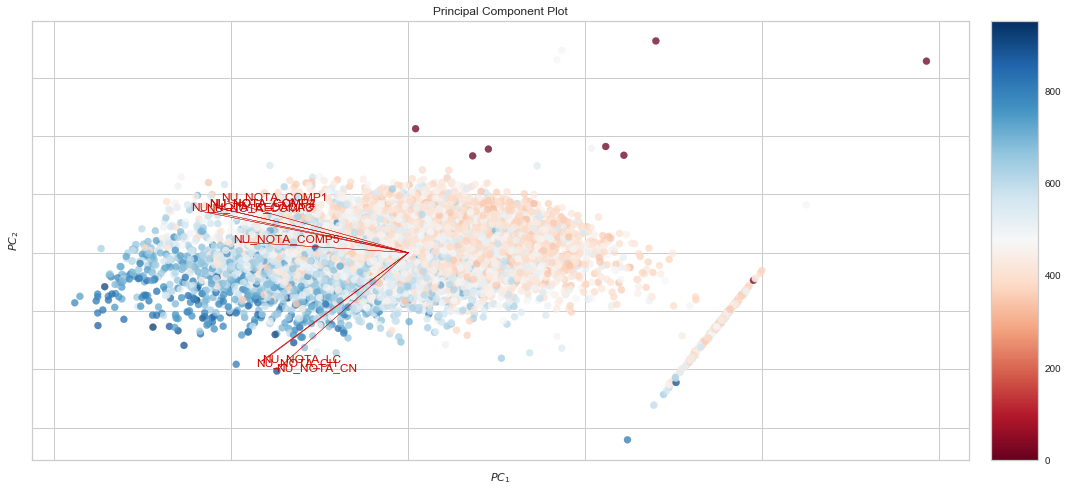

In [673]:
from yellowbrick.features.pca import PCADecomposition

plt.figure(figsize= (15,7))
visualizer = PCADecomposition(scale=True, proj_features=True)
visualizer.fit_transform(X_train, y_train)
visualizer.show()

# Análise das melhores Features

In [16]:
from sklearn.decomposition import PCA 
# Faça uma instância do modelo 
pca = PCA (.95)
pca.fit(X_train)

NameError: name 'X_train' is not defined

In [18]:
df_train.dtypes

Unnamed: 0                   int64
NU_INSCRICAO                object
NU_ANO                       int64
CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_IDADE                     int64
TP_SEXO                     object
TP_ESTADO_CIVIL            float64
TP_COR_RACA                  int64
TP_NACIONALIDADE             int64
CO_MUNICIPIO_NASCIMENTO    float64
NO_MUNICIPIO_NASCIMENTO     object
CO_UF_NASCIMENTO           float64
SG_UF_NASCIMENTO            object
TP_ST_CONCLUSAO              int64
TP_ANO_CONCLUIU              int64
TP_ESCOLA                    int64
TP_ENSINO                  float64
IN_TREINEIRO                 int64
CO_ESCOLA                  float64
CO_MUNICIPIO_ESC           float64
NO_MUNICIPIO_ESC            object
CO_UF_ESC                  float64
SG_UF_ESC                   object
TP_DEPENDENCIA_ADM_ESC     float64
TP_LOCALIZACAO_ESC         float64
TP_SIT_FUNC_ESC     

In [19]:
df_aux = pd.DataFrame({'Coluna': df_train.columns,
                       'Tipo': df_train.dtypes 
})

In [20]:
df_aux = df_aux.drop('Unnamed: 0')

In [21]:
colunas_numericas = list(df_aux[df_aux['Tipo'] != 'object']['Coluna'])

In [22]:
colunas_numericas

['NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR',
 'IN_ACESSO',
 'IN_TRANSCRICAO',
 'IN_LIBRAS',
 'IN_LEITURA_LABIAL',
 'IN_MESA_CADEIRA_RODAS',
 'IN_MESA_CADEIRA_SEPARADA',
 'IN_APOIO_PERNA',
 'IN_GUIA_INTERPRETE',
 'IN_MAC

In [379]:
X = df_train[variaveis].drop('NU_NOTA_MT', axis= 1).fillna(0)
y = df_train['NU_NOTA_MT']

In [40]:
variavel = ''
for coluna in colunas_numericas:
    metrica = 0.20
    if coluna != 'NU_NOTA_MT':
        valor_corr = df_train['NU_NOTA_MT'].corr(df_train[coluna])
    if valor_corr > metrica:
        variavel = coluna + ',' + variavel

In [41]:
variaveis = ['NU_NOTA_REDACAO', 'NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP3', 'NU_NOTA_COMP2',
             'NU_NOTA_COMP1', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN']

In [42]:
#Visualizador de correlacao com o target
features = list(X.columns)
visualizer = FeatureCorrelation(labels=features)
visualizer.fit(X, y)
visualizer.show()

NameError: name 'FeatureCorrelation' is not defined

# Funções

In [55]:
def CriaArquivo(predicao):
    df_test['NU_NOTA_MT'] = np.around(1000, 2)
    filtro = ['NU_INSCRICAO', 'NU_NOTA_MT']
    df_resultado = df_test[filtro]
    df_resultado.to_csv('answer.csv', index=False)

In [56]:
def Metrica(predict):
    from sklearn.metrics import mean_absolute_error
    return mean_absolute_error(y_test, predict)

# Modelo de Regressão Usado

In [26]:
X = df_train[features].drop(['NU_NOTA_MT'], axis= 1)
y = df_train['NU_NOTA_MT']

In [27]:
X.shape

(13730, 9)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 40, test_size= 0.30)

In [29]:
X_train.shape

(9611, 9)

In [30]:
X_test.shape

(4119, 9)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_std = sc.fit_transform(X_train)
predicao_std = sc.transform(df_test_predict)

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
y = model.predict(X_test)

In [50]:
pd.DataFrame({'predito' : y, 'real': y_test})

,predito,real
581,547.418494,555.400000
1944,546.098181,600.300000
4945,482.342833,482.497928
5516,486.980994,517.900000
4954,479.910681,463.300000
3652,536.389441,531.000000
4249,482.342833,482.497928
12497,482.342833,482.497928
8440,453.249060,535.400000
2871,450.527625,417.700000


In [51]:
df_test_predict = df_test[features_test]

In [52]:
y_predict = model.predict(df_test_predict)

In [57]:
CriaArquivo(y_predict)

# Usando o AutoML

In [873]:
from tpot import TPOTRegressor

In [894]:
tpot = TPOTRegressor(population_size = 20, generations = 10, verbosity = 2)
tpot.fit(X_train, y_train)

Generation 1 - Current best internal CV score: -4206.203720117391
Generation 2 - Current best internal CV score: -4206.203720117391
Generation 3 - Current best internal CV score: -4203.196952875881
Generation 4 - Current best internal CV score: -4203.196952875881
Generation 5 - Current best internal CV score: -4198.757019527599
Generation 6 - Current best internal CV score: -4198.757019527599
Generation 7 - Current best internal CV score: -4187.7726178623425
Generation 8 - Current best internal CV score: -4187.7726178623425
Generation 9 - Current best internal CV score: -4187.7726178623425
Generation 10 - Current best internal CV score: -4185.232569553123

Best pipeline: LassoLarsCV(AdaBoostRegressor(LassoLarsCV(input_matrix, normalize=False), learning_rate=0.01, loss=linear, n_estimators=100), normalize=True)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=10,
              max_eval_time_mins=5, max_time_mins=None, memory=None,
              mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=20,
              random_state=None, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=2, warm_start=False)

In [895]:
tpot.export('./output/pipeline_tpot_regressao.py')

In [878]:
from sklearn.ensemble import AdaBoostRegressor

# NOTE: Make sure that the outcome column is labeled 'target' in the data file

# Average CV score on the training set was: -4321.956962957516
exported_pipeline = AdaBoostRegressor(learning_rate=0.01, loss="linear", n_estimators=100)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)

In [879]:
results

array([544.92728376, 503.71657406, 478.05039679, ..., 443.11244423,
       477.51704664, 477.76596652])

In [880]:
pd.DataFrame({'predito' : results, 'real': y_test})

,predito,real
581,544.927284,555.400000
1944,503.716574,600.300000
4945,478.050397,482.497928
5516,441.741687,517.900000
4954,441.928537,463.300000
3652,503.716574,531.000000
4249,478.050397,482.497928
12497,478.050397,482.497928
8440,477.517047,535.400000
2871,441.418881,417.700000


In [881]:
y_predict = exported_pipeline.predict(df_test_predict)

In [883]:
CriaArquivo(y_predict)

In [887]:
Metrica(results)

46.38414301912872

In [896]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

# Average CV score on the training set was: -4185.232569553123
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LassoLarsCV(normalize=False)),
    StackingEstimator(estimator=AdaBoostRegressor(learning_rate=0.01, loss="linear", n_estimators=100)),
    LassoLarsCV(normalize=True)
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [897]:
pd.DataFrame({'predito' : results, 'real': y_test})

,predito,real
581,538.602725,555.400000
1944,542.659643,600.300000
4945,480.370356,482.497928
5516,480.624421,517.900000
4954,471.050441,463.300000
3652,532.594979,531.000000
4249,480.370356,482.497928
12497,480.370356,482.497928
8440,446.416297,535.400000
2871,445.046358,417.700000


In [898]:
Metrica(results)

44.72834765080053

In [899]:
y_predict = exported_pipeline.predict(df_test_predict)

In [900]:
CriaArquivo(y_predict)